Jan Carlo L. Lima  
## AP155 Long Exam 3

In [1]:
from numpy import arange,array,zeros,cos,sin,pi,empty,max,copy,sqrt
from matplotlib.pyplot import plot,scatter,xlabel,ylabel,legend,xlim,imshow
%matplotlib inline

### Problem 1

Given that:
$$ \frac{d^2x}{dt^2} = -g$$
plugging in equation 5.109 which says that:
$$ f''(x)= \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}$$
We then have,
$$ \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}= -g$$
isolating f(x),
$$ -2f(x)= -gh^2 - f(x+h) - f(x-h) $$



$$ f(x)= \frac{gh^2 + f(x+h) + f(x-h)}{2}$$
this will then be the equation we use

Text(0, 0.5, 'Height (x)')

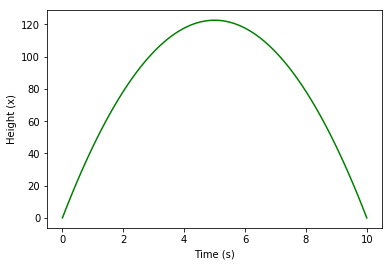

In [2]:
#Constants
M = 100 #number of points
x = 0.0 
target = 1e-6 #target accuracy
g = 9.81
h = 10./float(M-1)

#arrays for the values
f = zeros(M, float)
fprime = empty(M,float)

delta = 1.0
while delta>target:
    for t in arange(M):
        if t==0 or t==M-1:
            fprime[t] = f[t]
        else:
            fprime[t] = (g*h**2 + f[t+1] + f[t-1])/2.0 #Equation we derived earlier
    delta = max(abs(f-fprime))
    # Swap the arrays
    f,fprime = fprime,f

plot(arange(M)*h, f, 'g')
xlabel("Time (s)")
ylabel("Height (x)")

### Problem 2

Text(0, 0.5, 'population (x1000)')

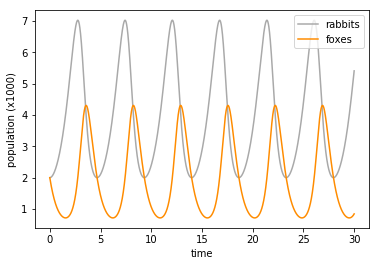

In [3]:
#problem constants
alp = 1.0
bet = 0.5
gam = 0.5
delt = 2.0

def f(R):
    x = R[0]
    y = R[1]
    f_x = (alp*x) - (bet*x*y)
    f_y = (gam*x*y) - (delt*y)
    return array([f_x,f_y],float)

R = array([2,2],float)

def Rk_4(R):
    k1 = h*f(R)
    k2 = h*f(R+0.5*k1)
    k3 = h*f(R+0.5*k2)
    k4 = h*f(R+k3)
    return (k1+2*k2+2*k3+k4)/6

start = 0
end = 30
N = 1e4
h = (end-start)/N

tpoints = arange(start,end,h)
xpoints = []
ypoints = []

for t in tpoints:
    xpoints.append(R[0])
    ypoints.append(R[1])
    R += Rk_4(R)

plot(tpoints,xpoints, color='darkgray',label='rabbits')
plot(tpoints,ypoints, color='darkorange',label='foxes')
legend()
xlabel("time")
ylabel("population (x1000)")

As we can see, the solution of the equations oscillates, both of the populations going up and down with the sam frequency, but with a delay between them. When there are few foxes the rabbits proliferate because they are not being eaten, but once there are many rabbits then the foxes get lots of food and start to proliferate too. But lots of foxes means the rabbit population goes down again, because they are getting eaten, and then the fox population goes down too, because the food supply has disappeared, and so the cycle starts again.

### Problem 3

### Expected:

Text(0, 0.5, 'f(t)')

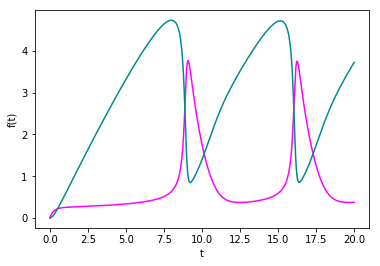

In [4]:
#problem constants
a = 1.0
b = 3.0

def f(R):
    x = R[0]
    y = R[1]
    f_x = 1 - ((b+1)*x) + (a*(x**2)*y)
    f_y = (b*x) - (a*(x**2)*y)
    return array([f_x,f_y],float)

R = array([0,0],float)

def Rk_4(R):
    k1 = h*f(R)
    k2 = h*f(R+0.5*k1)
    k3 = h*f(R+0.5*k2)
    k4 = h*f(R+k3)
    return (k1+2*k2+2*k3+k4)/6

start = 0
end = 20
N = 1e4
h = (end-start)/N

tpoints = arange(start,end,h)
xpoints = []
ypoints = []

for t in tpoints:
    xpoints.append(R[0])
    ypoints.append(R[1])
    R += Rk_4(R)

plot(tpoints,xpoints, color='magenta')
plot(tpoints,ypoints, color='darkcyan')
xlabel("t")
ylabel("f(t)")

### Actual

Text(0, 0.5, 'f(t)')

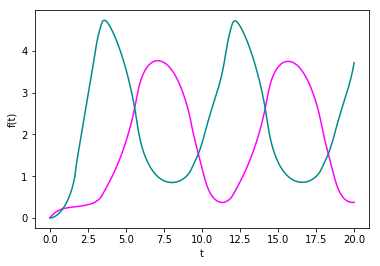

In [5]:
#Define functions used
#for the ODE
def euclid(x,y):
    return sqrt(x**2 + y**2)
def f(r,t):
    a = 1.0
    b = 3.0
    x = r[0]
    y = r[1]
    fx = 1.0 - ((b+1)*x) + (a*(x**2)*y)
    fy = (b*x) - (a*(x**2)*y)
    return array([fx,fy],float)

#for the adaptive method
def error_x(x1,x2):
    return (1.0/30.0)*(x1 - x2)
def error_y(y1,y2):
    return (1.0/30.0)*(y1 - y2)

xpoints = []
ypoints = []
r = array([0.0,0.0],float)     #Defines the starting array

#Define the start and endpoint
start = 0
end = 20
delta = 1e-10
h = 1.0e-3
rho = 0.0
t = start
while t <= end:
    # performs 2 h steps
    r_2_steps = copy(r)
    for i in range(2):
        k1 = h*f(r_2_steps,t)
        k2 = h*f(r_2_steps+0.5*k1,t+0.5*h)
        k3 = h*f(r_2_steps+0.5*k2,t+0.5*h)
        k4 = h*f(r_2_steps+k3,t+h)
        r_2_steps += (k1+2*k2+2*k3+k4)/6
    r1 = r_2_steps
    
    #performs with 1 2h step
    r_1_step = copy(r)
    for i in range(1):
        k1 = 2*h*f(r_1_step,t)
        k2 = 2*h*f(r_1_step+0.5*k1,t+0.5*2*h)
        k3 = 2*h*f(r_1_step+0.5*k2,t+0.5*2*h)
        k4 = 2*h*f(r_1_step+k3,t+2*h)
        r_1_step += (k1+2*k2+2*k3+k4)/6
    r2 = r_1_step
    
    if r1[0] == r2[0] and r1[1] == r2[1]:
        #proceed with calculation
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
        t += h
        
    else:
        rho = (h*delta)/sqrt(error_x(r1[0],r2[0])**2 + error_y(r1[1],r2[1])**2)
        if rho < 1.0:
            while rho < 1.0:
                h = h*(rho**0.25)
                rho = (30.0*h*delta)/sqrt(error_x(r1[0],r2[0])**2 + error_y(r1[1],r2[1])**2)
            #when rho is fixed, proceed with calculation:
            xpoints.append(r[0])
            ypoints.append(r[1])
            k1 = h*f(r,t)
            k2 = h*f(r+0.5*k1,t+0.5*h)
            k3 = h*f(r+0.5*k2,t+0.5*h)
            k4 = h*f(r+k3,t+h)
            r += (k1+2*k2+2*k3+k4)/6
            t += h
            
        elif rho > 1.0:
            #rho is fine, so we do the calculation
            xpoints.append(r[0])
            ypoints.append(r[1])
            k1 = h*f(r,t)
            k2 = h*f(r+0.5*k1,t+0.5*h)
            k3 = h*f(r+0.5*k2,t+0.5*h)
            k4 = h*f(r+k3,t+h)
            r += (k1+2*k2+2*k3+k4)/6
            t += h
            #but we fix rho to make it slower
            h = h*rho**0.25
        elif r1[0] == r2[0] and r1[1] == r2[1]:
            #proceed with calculation
            xpoints.append(r[0])
            ypoints.append(r[1])
            k1 = h*f(r,t)
            k2 = h*f(r+0.5*k1,t+0.5*h)
            k3 = h*f(r+0.5*k2,t+0.5*h)
            k4 = h*f(r+k3,t+h)
            r += (k1+2*k2+2*k3+k4)/6
            t += h
            
blah = len(xpoints)
tpoints = arange(start,end,end/blah)
plot(tpoints,xpoints, color='magenta')
plot(tpoints,ypoints, color='darkcyan')
xlabel("t")
ylabel("f(t)")

### Problem 4

Starting with:
$$ \frac{\partial \phi}{\partial t}= D[\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}]$$
Replacing with the finite differences on a square grid,
$$ f''(x)= \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}$$
where h is the step size
plugging into our second derivatives,



$$ \frac{d\phi(x,y,t)}{dt} = D[\frac{\phi (x+a,y,t) + \phi(x-a,y,t) - 2\phi(x,y,t)}{a^2} + \frac{\phi(x,y+a,t) + \phi (x,y-a,t) - 2\phi(x,y,t)}{a^2}$$
Simplifying:
$$\frac{d\phi(x,y,t)}{dt} = \frac{D}{a^2}[\phi (x+a,y,t) + \phi(x-a,y,t) - 2\phi(x,y,t)+ \phi(x,y+a,t) + \phi (x,y-a,t) - 2\phi(x,y,t)$$


$$\frac{d\phi(x,y,t)}{dt} = \frac{D}{a^2}[\phi (x+a,y,t) + \phi(x-a,y,t) + \phi(x,y+a,t) + \phi (x,y-a,t) - 4\phi(x,y,t)$$

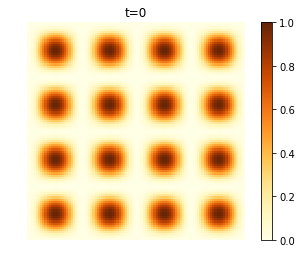

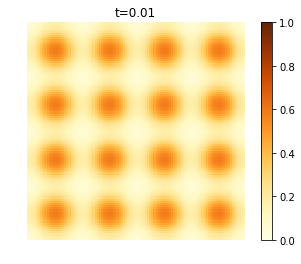

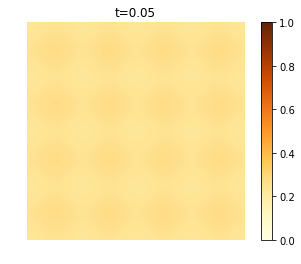

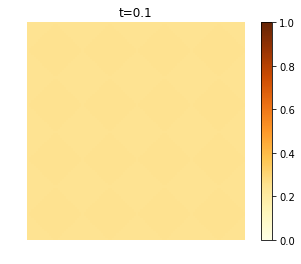

In [6]:
from numpy import sin, pi, zeros, ogrid, linspace, roll
%matplotlib inline
from matplotlib.pyplot import imshow, figure, colorbar, title, axis
L = 1.
D = 0.1
h = 1e-5
tcheck = [0, 0.01, 0.05, 0.1]
icheck = [0, 1000, 5000, 10000]  #manually divide tcheck by h - there are no round-off errors when we use integers
N = 100  #grid size
a = L/N

def phi0(x, y, L):
    return (sin(4*pi*x/len(x)*L))**2*(sin(4*pi*y/len(x)*L))**2

def phi_step(phi, D, h, a):
    return phi + D*h/(a*a)*(roll(phi,1,axis=0)+roll(phi,-1,axis=0)+roll(phi,1,axis=1)+roll(phi,-1,axis=1)-4*phi)

#Create the initial array of phi values
[x,y] = ogrid[0:N,0:N]
phi = phi0(x,y,L)
figure()
imshow(phi,vmin=0., vmax=1., cmap='YlOrBr')
axis('off')
title('t={0}'.format(tcheck[0]))
colorbar()
for i in range(len(icheck)-1):
    for t in range(icheck[i],icheck[i+1]):
        phi = phi_step(phi,D,h,a)
    figure()
    imshow(phi,vmin=0., vmax=1., cmap='YlOrBr')
    axis('off')
    title('t={0}'.format(tcheck[i+1]))
    colorbar()